In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import data set

In [2]:
metadata=pd.read_csv("metadata.csv")
sunroof_city_old=pd.read_csv("project-sunroof-city-02252018.csv")
sunroof_county_old=pd.read_csv("project-sunroof-county-02252018.csv")
sunroof_postalcode_old=pd.read_csv("project-sunroof-postal_code-02252018.csv")
sunroof_state_old=pd.read_csv("project-sunroof-state-02252018.csv")
population=pd.read_csv("census-state-populations.csv")

## Top 10 States have most solar panels installed

In [3]:
sunroof_state=sunroof_state_old.dropna

In [4]:
sunroof_state_install=sunroof_state_old[["state_name","existing_installs_count","lat_avg","lng_avg"]].dropna()

In [5]:
df1=sunroof_state_install.reset_index()
df1=df1.drop(['index'],axis=1)

In [6]:
most_install=df1.sort_values('existing_installs_count',ascending=False)
state_top10=most_install.head(n=10)['state_name']
state_install=most_install.head(n=10)['existing_installs_count']

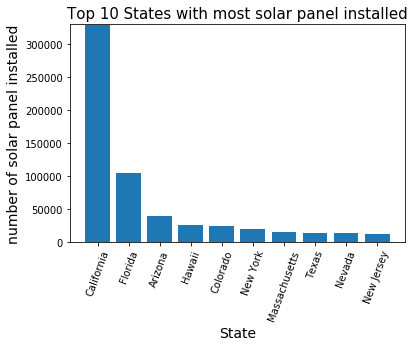

In [7]:
plt.bar(range(len(state_top10)), state_install, tick_label=state_top10)
plt.xticks(rotation=70)
plt.ylim(0,330000)
plt.title('Top 10 States with most solar panel installed',fontsize=15)
plt.xlabel('State',fontsize=14)
plt.ylabel('number of solar panel installed',fontsize=14)
plt.show()

### Here I plot the bar graph of top 10 states with most solar panels installed in US. As expected, California has the most amount of solar panels installed, and followed by Florida and Arizona. The following question will be is this result consistent with population ranking?

## Are these 10 states have most population as well?

In [8]:
population.columns

Index(['state', 'pop_est_2014'], dtype='object')

In [9]:
df = pd.merge(df1, population, left_on='state_name', right_on='state', how='outer')

In [10]:
df=df.drop(['state'],axis=1)

In [11]:
df=df.sort_values('pop_est_2014',ascending=False)

In [12]:
most_pop=df.head(n=10)['state_name']
state_pop=df.head(n=10)['pop_est_2014']

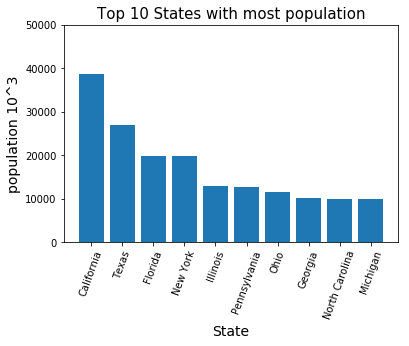

In [13]:
plt.bar(range(len(most_pop)), state_pop/1000, tick_label=most_pop)
plt.xticks(rotation=70)
plt.ylim(0,50000)
plt.title('Top 10 States with most population',fontsize=15)
plt.xlabel('State',fontsize=14)
plt.ylabel('population 10^3',fontsize=14)
plt.show()

### According to the population data from US, I also plot the top 10 states with most population and compare with the previous graph.  There are some interesting findings to be point out. First, there are some states with few populations but high number of panel installed, such as Hawaii Nevada. Also, there are some states with more populations but fewer number of panel installed, such as Texas and Illinois.

## Solar panel per population

In [14]:
df['installs_per_pop']=df['existing_installs_count']/df['pop_est_2014']*1000

In [15]:
df=df.sort_values('installs_per_pop',ascending=True)

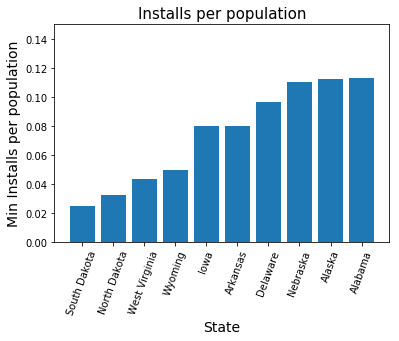

In [16]:
min_install_per_pop_state=df.head(n=10)['state_name']
min_installs_per_pop=df.head(n=10)['installs_per_pop']
plt.bar(range(len(min_install_per_pop_state)), min_installs_per_pop, tick_label=min_install_per_pop_state)
plt.xticks(rotation=70)
plt.ylim(0,0.15)
plt.title('Installs per population',fontsize=15)
plt.xlabel('State',fontsize=14)
plt.ylabel('Min Installs per population',fontsize=14)
plt.show()

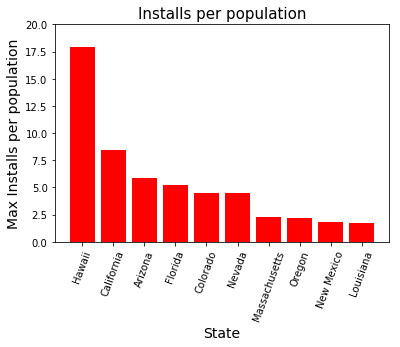

In [17]:
df=df.sort_values('installs_per_pop',ascending=False)
max_install_per_pop_state=df.head(n=10)['state_name']
max_installs_per_pop=df.head(n=10)['installs_per_pop']
plt.bar(range(len(max_install_per_pop_state)), max_installs_per_pop,tick_label=max_install_per_pop_state,color='r')
plt.xticks(rotation=70)
plt.ylim(0,20)
plt.title('Installs per population',fontsize=15)
plt.xlabel('State',fontsize=14)
plt.ylabel('Max Installs per population',fontsize=14)
plt.show()

### Combine the previous two sections, I calculate the solar panels per population and plot the most and least 10 states according to this ratio. The state with highest ratio is Hawaii and this is consistent with what we explored earlier. The 10 states with smallest ratio are listed in the bar gragh, intuitively think about this, these states are located northen part of US. To prove this, I will explore the relationship between this and the latitude data.

## Top 10 States with buildings are suitable for solar

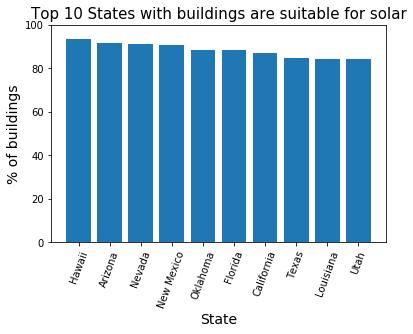

In [18]:
state_qualified=sunroof_state_old[["state_name","percent_qualified","percent_covered","lat_avg","lng_avg"]].dropna()
state_qualified_1=state_qualified.sort_values('percent_qualified',ascending=False)
state_top10=state_qualified_1.head(n=10)['state_name']
state_percent_qualified=state_qualified_1.head(n=10)['percent_qualified']
plt.bar(range(len(state_top10)), state_percent_qualified, tick_label=state_top10)
plt.xticks(rotation=70)
plt.ylim(0,100)
plt.title('Top 10 States with buildings are suitable for solar',fontsize=15)
plt.xlabel('State',fontsize=14)
plt.ylabel('% of buildings',fontsize=14)
plt.show()

## Potential effect of latitude and longitude to solar effect

In [19]:
max_10_lat=most_install.head(n=10)[['state_name','lat_avg']]
min_10_lat=most_install.tail(n=10)[['state_name','lat_avg']]
max_10_lat_state=most_install.head(n=10)['state_name']
min_10_lat_state=most_install.tail(n=10)['state_name']

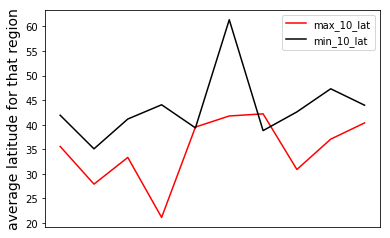

In [20]:
plt.figure()

plt.plot(range(len(max_10_lat_state)),max_10_lat['lat_avg'], 'r',label='max_10_lat')
plt.plot(range(len(min_10_lat_state)),min_10_lat['lat_avg'], 'k',label='min_10_lat')
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
plt.xlabel('State',fontsize=14)
plt.ylabel('average latitude for that region',fontsize=14)
plt.legend()
plt.show()

## States with most carbon offset

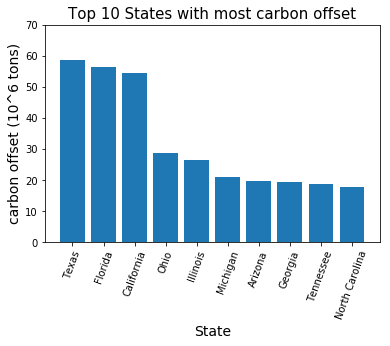

In [38]:
most_carbon_offset=sunroof_state_old[['state_name','carbon_offset_metric_tons']].dropna()
most_carbon_offset=most_carbon_offset.sort_values('carbon_offset_metric_tons',ascending=False)
most_carbon_state_top10_name=most_carbon_offset.head(n=10)['state_name']
most_carbon_state_top10=most_carbon_offset.head(n=10)['carbon_offset_metric_tons']

plt.bar(range(len(most_carbon_state_top10_name)), most_carbon_state_top10/10**6, tick_label=most_carbon_state_top10_name)
plt.xticks(rotation=70)
plt.ylim(0,70)
plt.title('Top 10 States with most carbon offset',fontsize=15)
plt.xlabel('State',fontsize=14)
plt.ylabel('carbon offset (10^6 tons)',fontsize=14)
plt.show()

In [65]:
df2 = pd.merge(most_carbon_offset, most_install, left_on='state_name', right_on='state_name', how='outer')

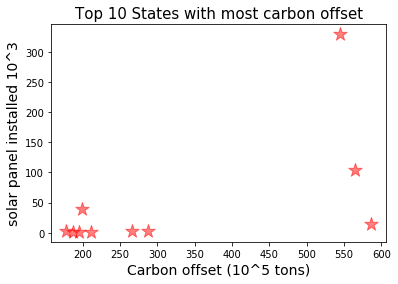

In [64]:
df2_top10=df2.head(10)
plt.scatter(df2_top10['carbon_offset_metric_tons']/10**5,df2_top10['existing_installs_count']/1000,c='r',s=200,marker='*',alpha=0.5)
plt.title('Top 10 States with most carbon offset',fontsize=15)
plt.xlabel('Carbon offset (10^5 tons)',fontsize=14)
plt.ylabel('solar panel installed 10^3',fontsize=14)

plt.show()